importing Jupyter notebook from alarm.ipynb


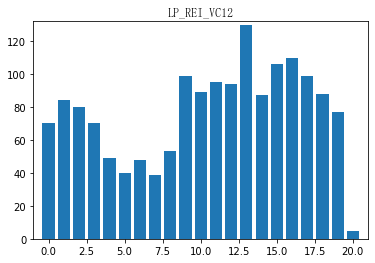

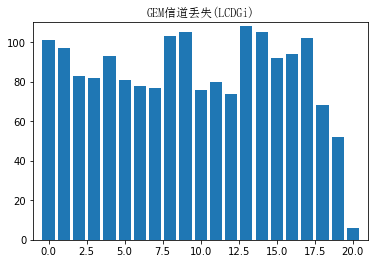

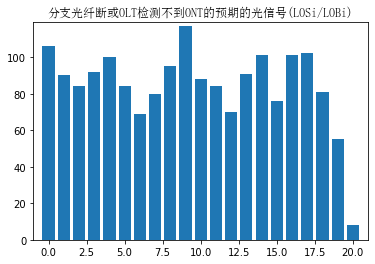

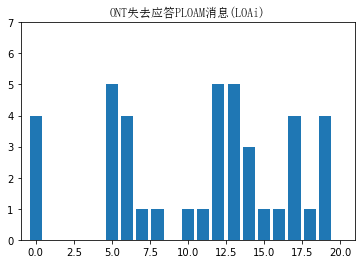

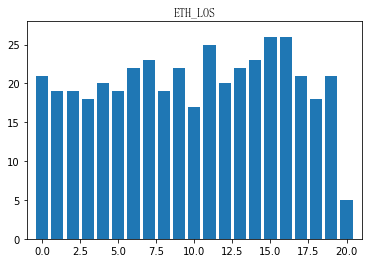

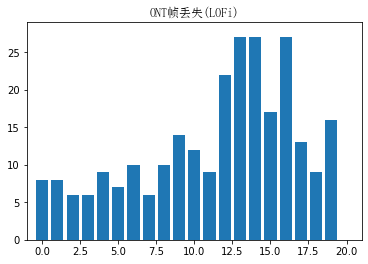

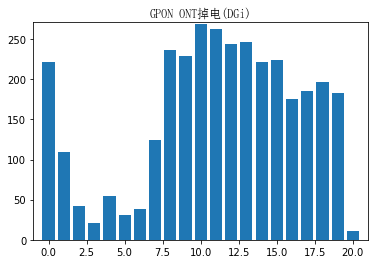

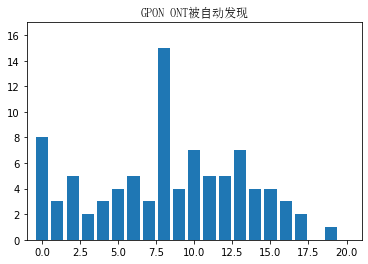

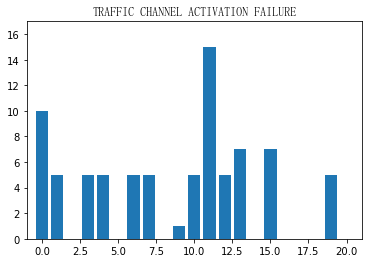

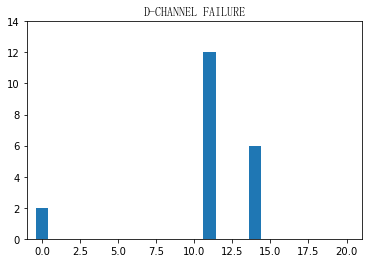

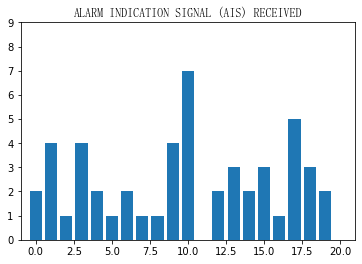

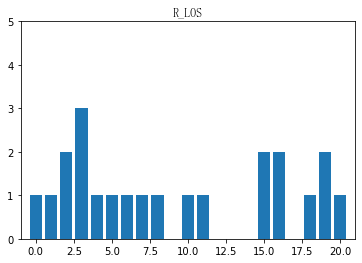

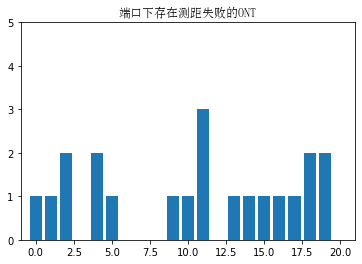

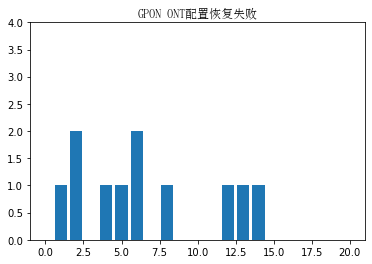

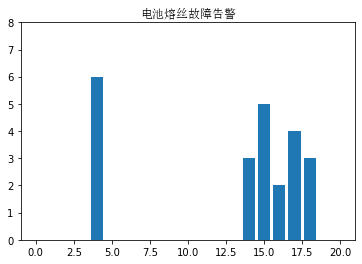

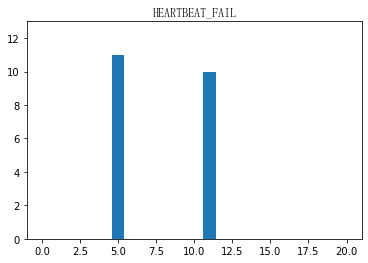

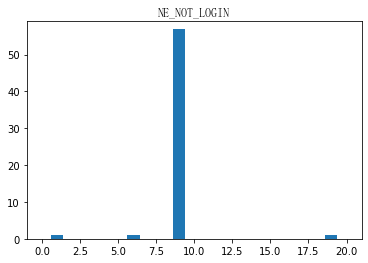

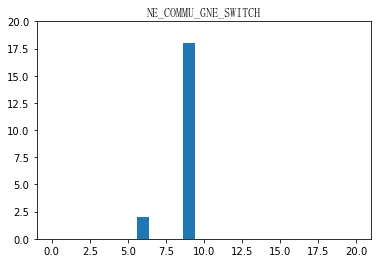

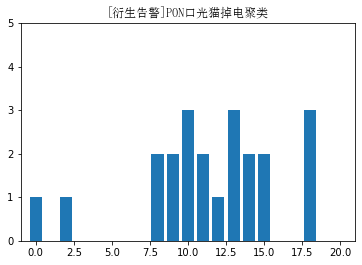

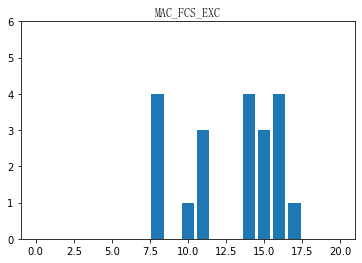

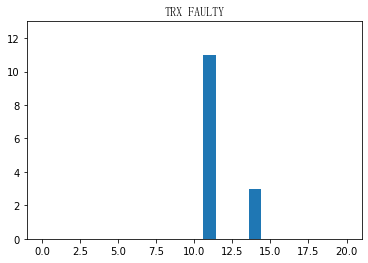

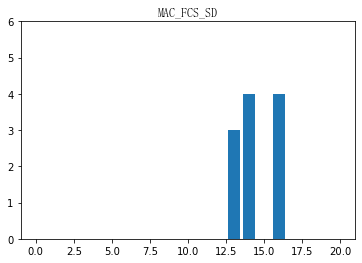

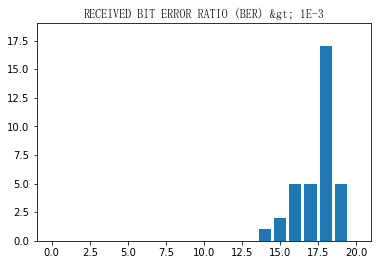

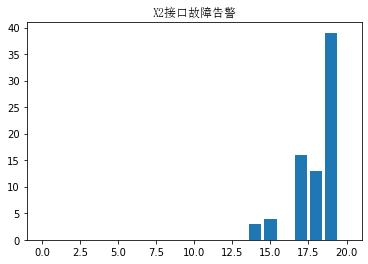

[(0, 306), (1, 111), (2, 321), (3, 344), (4, 373), (5, 439), (6, 388), (7, 419), (8, 398), (9, 387), (10, 238), (11, 398), (12, 368), (13, 193), (14, 194), (15, 189), (16, 182), (17, 137), (18, 174), (19, 108), (20, 39), (21, 98), (22, 245), (23, 258), (24, 244), (25, 257), (26, 245), (27, 189), (28, 363), (29, 355), (30, 346), (31, 302), (32, 341), (33, 330), (34, 301), (35, 297), (36, 292), (37, 304), (38, 125), (39, 139), (40, 97), (41, 58), (42, 64), (43, 0), (44, 796), (45, 902), (46, 865), (47, 838), (48, 527), (49, 515), (50, 772), (51, 759), (52, 614), (53, 650), (54, 627), (55, 591), (56, 662), (57, 682), (58, 701), (59, 686), (60, 675), (61, 678), (62, 593), (63, 554), (64, 581), (65, 843), (66, 849), (67, 848), (68, 782), (69, 771), (70, 791), (71, 536), (72, 538), (73, 423), (74, 713), (75, 728), (76, 565), (77, 18), (78, 474), (79, 486), (80, 476), (81, 489), (82, 411), (83, 1140), (84, 1145), (85, 1105), (86, 1195), (87, 1188), (88, 938), (89, 808), (90, 1087), (91, 1112)

In [1]:
import import_ipynb
from alarm import near,title

In [2]:
class treeNode:
    def __init__(self, nameValue, numOccur, parentNode):
        self.name = nameValue
        self.count = numOccur
        self.nodeLink = None
        self.parent = parentNode      #needs to be updated
        self.children = {} 
    
    def inc(self, numOccur):
        self.count += numOccur
        
    def disp(self, ind=1):
        print ('  '*ind, self.name, ' ', self.count)
        for child in self.children.values():
            child.disp(ind+1)
def createTree(dataSet, minSup=1): #create FP-tree from dataset but don't mine
    headerTable = {}
    #go over dataSet twice
    for trans in dataSet:#first pass counts frequency of occurance
        for item in trans:
            headerTable[item] = headerTable.get(item, 0) + dataSet[trans]
    for k in list(headerTable.keys()):  #remove items not meeting minSup
        if headerTable[k] < minSup: 
            del(headerTable[k])
    freqItemSet = set(headerTable.keys())
    #print 'freqItemSet: ',freqItemSet
    if len(freqItemSet) == 0: return None, None  #if no items meet min support -->get out
    for k in headerTable:
        headerTable[k] = [headerTable[k], None] #reformat headerTable to use Node link 
    #print 'headerTable: ',headerTable
    retTree = treeNode('Null Set', 1, None) #create tree
    for tranSet, count in dataSet.items():  #go through dataset 2nd time
        localD = {}
        for item in tranSet:  #put transaction items in order
            if item in freqItemSet:
                localD[item] = headerTable[item][0]
        if len(localD) > 0:
            orderedItems = [v[0] for v in sorted(localD.items(), key=lambda p: p[1], reverse=True)]
            updateTree(orderedItems, retTree, headerTable, count)#populate tree with ordered freq itemset
    return retTree, headerTable #return tree and header table

def updateTree(items, inTree, headerTable, count):
    if items[0] in inTree.children:#check if orderedItems[0] in retTree.children
        inTree.children[items[0]].inc(count) #incrament count
    else:   #add items[0] to inTree.children
        inTree.children[items[0]] = treeNode(items[0], count, inTree)
        if headerTable[items[0]][1] == None: #update header table 
            headerTable[items[0]][1] = inTree.children[items[0]]
        else:
            updateHeader(headerTable[items[0]][1], inTree.children[items[0]])
    if len(items) > 1:#call updateTree() with remaining ordered items
        updateTree(items[1::], inTree.children[items[0]], headerTable, count)
        
def updateHeader(nodeToTest, targetNode):   #this version does not use recursion
    while (nodeToTest.nodeLink != None):    #Do not use recursion to traverse a linked list!
        nodeToTest = nodeToTest.nodeLink
    nodeToTest.nodeLink = targetNode

In [3]:
def loadSimpDat():
    simpDat = []
    for n1 in near:
        sd=[]
        for n2 in n1:
            sd.append(title[n2])
        simpDat.append(sd)
    return simpDat

def createInitSet(dataSet):
    retDict = {}
    for trans in dataSet:
        retDict[frozenset(trans)] = 1
    return retDict

In [4]:
simpdat=loadSimpDat()

In [5]:
initset=createInitSet(simpdat)

In [6]:
myFPtree,myHeaderTab=createTree(initset,100)

In [7]:
myFPtree.disp()

   Null Set   1
     LP_REI_VC12   54
       GEM信道丢失(LCDGi)   23
     GPON ONT掉电(DGi)   188
       分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)   68
         LP_REI_VC12   28
           GEM信道丢失(LCDGi)   8
         GEM信道丢失(LCDGi)   13
       LP_REI_VC12   38
         GEM信道丢失(LCDGi)   12
       GEM信道丢失(LCDGi)   30
     分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)   83
       GEM信道丢失(LCDGi)   16
       LP_REI_VC12   29
         GEM信道丢失(LCDGi)   12
     GEM信道丢失(LCDGi)   25


In [8]:
def ascendTree(leafNode, prefixPath): #ascends from leaf node to root
    if leafNode.parent != None:
        prefixPath.append(leafNode.name)
        ascendTree(leafNode.parent, prefixPath)
    
def findPrefixPath(basePat, treeNode): #treeNode comes from header table
    condPats = {}
    while treeNode != None:
        prefixPath = []
        ascendTree(treeNode, prefixPath)
        if len(prefixPath) > 1: 
            condPats[frozenset(prefixPath[1:])] = treeNode.count
        treeNode = treeNode.nodeLink
    return condPats
def mineTree(inTree, headerTable, minSup, preFix, freqItemList):
    bigL = [v[0] for v in sorted(headerTable.items(), key=lambda p: p[1][0])]#(sort header table)
    for basePat in bigL:  #start from bottom of header table
        newFreqSet = preFix.copy()
        newFreqSet.add(basePat)
        #print 'finalFrequent Item: ',newFreqSet    #append to set
        freqItemList.append(newFreqSet)
        condPattBases = findPrefixPath(basePat, headerTable[basePat][1])
        #print 'condPattBases :',basePat, condPattBases
        #2. construct cond FP-tree from cond. pattern base
        myCondTree, myHead = createTree(condPattBases, minSup)
        #print 'head from conditional tree: ', myHead
        if myHead != None: #3. mine cond. FP-tree
            #print 'conditional tree for: ',newFreqSet
            #myCondTree.disp(1)            
            mineTree(myCondTree, myHead, minSup, newFreqSet, freqItemList)

In [12]:
freqItems=[]

In [13]:
mineTree(myFPtree,myHeaderTab,10, set([]), freqItems)

In [14]:
freqItems

[{'GEM信道丢失(LCDGi)'},
 {'GEM信道丢失(LCDGi)', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GEM信道丢失(LCDGi)', 'LP_REI_VC12', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GEM信道丢失(LCDGi)', 'GPON ONT掉电(DGi)', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GEM信道丢失(LCDGi)', 'LP_REI_VC12'},
 {'GEM信道丢失(LCDGi)', 'GPON ONT掉电(DGi)', 'LP_REI_VC12'},
 {'GEM信道丢失(LCDGi)', 'GPON ONT掉电(DGi)'},
 {'LP_REI_VC12'},
 {'LP_REI_VC12', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GPON ONT掉电(DGi)', 'LP_REI_VC12', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GPON ONT掉电(DGi)', 'LP_REI_VC12'},
 {'分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GPON ONT掉电(DGi)', '分支光纤断或OLT检测不到ONT的预期的光信号(LOSi/LOBi)'},
 {'GPON ONT掉电(DGi)'}]